In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import scipy.integrate
%matplotlib inline

## Menten Kinetics Model

In [55]:
def menten_model(E_S_ES_P, t, kf, kr, kcat):
    
    E,S,ES,P = E_S_ES_P
    
    dE = -kf*E*S + kr*ES + kcat*ES
    dS = -kf*E*S + kr*ES
    dES = kf*E*S - kr*ES - kcat*ES
    dP = kcat*ES
    
    return dE, dS, dES, dP

In [57]:
kf = 0.001
kr = 0.0001
kcat = 0.1
E0 = 200
E_S_ES_P = (200,500,0,0)

t = np.linspace(0,50,500)

data = sci.integrate.odeint(menten_model, E_S_ES_P, t, args=(kf, kr ,kcat))

In [58]:
sns.set_style('white')

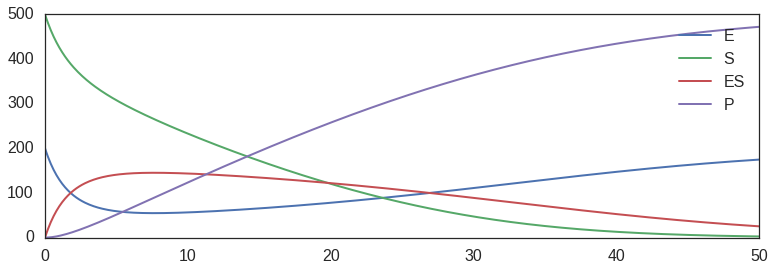

In [59]:
sns.set_context('poster')

fig = plt.figure(dpi=100)

plt.subplot(2,1,1)

for i,e in zip(range(4), ['E','S','ES','P']):
    plt.plot(t, data[:,i], lw=2, label=e)
    
plt.legend();

In [ ]:
class Calvin(object):
    def __init__(self):
        '''kinetic parameters & equilibrium constants'''
        self.par = {'V1' : 0.34*8,#orginal
                    'V6' : 0.2*8,#orginal
                    'V9' : 0.04*8,#orginal
                    'V13' : 0.9999*8,#orginal
                    'V16' : 0.35*8,#orginal
                    'Vst' : 0.04*8,#orginal
                    'Vx' : 0.25*8,#orginal
                    'Vnadph' : 0.352*8,#ausgerechneter wert (ideal wert) #orginal
                    "Km1" : 0.02,
                    "KmCO2": 0.0107 ,#millimol laut witzel,
                    "Km6" : 0.03,
                    "Km9" : 0.013,
                    "Km131" : 0.05,
                    "Km132" : 0.05,
                    "Km161" : 0.014,
                    "Km162" : 0.3,
                    "Kmst1" : 0.08,
                    "Kmst2" : 0.08,
                    "Kmnadph" : 0.19,#ausgerechneter wert (ideal wert)
                    "Kpga" : 0.25,
                    "Kgap" : 0.075,
                    "Kdhap" : 0.077,
                    "Kpi" : 0.63,
                    "Kpxt" : 0.74,
                    "Ki11" : 0.04,
                    "Ki12" : 0.04,
                    "Ki13" : 0.075,
                    "Ki14" : 0.9,
                    "Ki15" : 0.07,
                    "Ki61" : 0.7,
                    "Ki62" : 12.0,
                    "Ki9" : 12.0,
                    "Ki131" : 2.0,
                    "Ki132" : 0.7,
                    "Ki133" : 4.0, 
                    "Ki134" : 2.5, 
                    "Ki135" : 0.4, 
                    "Kist" : 10.0, 
                    "Kast1" : 0.1, 
                    "Kast2" : 0.02, 
                    "Kast3" : 0.02, 
                    "k" : 10.0**8.0*8, 
                    "q2" : 3.1 * (10.0 ** (-4.0)),
                   "q3" : 1.6 * (10.0**7.0),
                   "q4" : 22.0,
                   "q5" : (7.1),
                   "q7" : 0.084,
                   "q8" : (13.0),
                   "q10" : 0.85,
                   "q11" : 0.4,
                   "q12" : 0.67,
                   "q14" : 2.3,
                   "q15" : 0.058}

        '''fixed stoichiometric parameters'''
        self.CN=0.5
        self.CO2 = 0.2
        self.Cp = 15.0
        self.Ca = 0.5
        self.pHmedium = 7.6
        self.pHstroma = 7.9
        self.H = (10.0**((-1.0)*self.pHstroma))*1000.0
        self.Pext = 0.5
        
   
    def v1(self,RUBP,PGA,FBP,SBP,P,NADPH):
        return (self.par['V1']*RUBP*self.CO2)/((RUBP+self.par["Km1"]*(1+(PGA/self.par["Ki11"])+(FBP/self.par["Ki12"])+(SBP/self.par["Ki13"])+(P/self.par["Ki14"])+(NADPH/self.par["Ki15"])))*(self.CO2+self.par['KmCO2']))
    
    def v2(self, ATP,PGA,ADP, BPGA):
        return self.par["k"]*((ATP*PGA)-(1/self.par["q2"])*(ADP*BPGA))

    def v3(self,NADPH, BPGA, GAP,NADP, P):
        return self.par["k"]*((NADPH*BPGA*self.H)-(1/self.par["q3"])*(GAP*NADP*P))

    def v4(self,GAP, DHAP):
        return self.par["k"]*((GAP)-(1/self.par["q4"])*(DHAP))

    def v5(self,GAP, DHAP, FBP):
        return self.par["k"]*((GAP*DHAP)-(1/self.par["q5"])*(FBP))

    def v6(self,FBP, F6P, P):
        return (self.par['V6']*FBP)/(FBP+self.par["Km6"]*(1+(F6P/self.par["Ki61"])+(P/self.par["Ki62"])))

    def v7(self,GAP, F6P, X5P, E4P):
        return self.par["k"]*((GAP*F6P)-(1/self.par["q7"])*(X5P*E4P))

    def v8(self, DHAP, E4P, SBP):
        return self.par["k"]*((DHAP*E4P)-(1/self.par["q8"])*(SBP))

    def v9(self,SBP, P):
        return (self.par['V9']*SBP)/(SBP+self.par["Km9"]*(1+(P/self.par["Ki9"])))

    def v10(self,GAP, S7P, X5P, R5P):
        return self.par["k"]*((GAP*S7P)-(1/self.par["q10"])*(X5P*R5P))

    def v11(self,R5P, RU5P):
        return self.par["k"]*((R5P)-(1/self.par["q11"])*(RU5P))

    def v12(self, X5P, RU5P):
        return self.par["k"]*((X5P)-(1/self.par["q12"])*(RU5P))

    def v13(self, RU5P, ATP, PGA, RUBP, P, ADP):
        return (self.par['V13']*RU5P*ATP)/((RU5P+self.par["Km131"]*(1+(PGA/self.par["Ki131"])+(RUBP/self.par["Ki132"])+(P/self.par["Ki133"])))*(ATP*(1+(ADP/self.par["Ki134"]))+self.par["Km132"]*(1+(ADP/self.par["Ki135"]))))

    def v14(self, F6P, G6P):
        return self.par["k"]*((F6P)-(1/self.par["q14"])*(G6P))

    def v15(self, G6P, G1P):
        return self.par["k"]*((G6P)-(1/self.par["q15"])*(G1P))
    
    def v16(self, ADP, P):
        return (self.par['V16']*ADP*P)/((ADP+self.par["Km161"])*(P+self.par["Km162"]))

    def N (self, P, PGA, GAP, DHAP):
        return 1+(1+(self.par["Kpxt"]/self.Pext))*((P/self.par["Kpi"])+(PGA/self.par["Kpga"])+(GAP/self.par["Kgap"])+(DHAP/self.par["Kdhap"]))

    def vpga(self, PGA, P, GAP, DHAP):
        return (self.par['Vx']*PGA)/(self.N(P, PGA, GAP, DHAP)*self.par["Kpga"])

    def vgap(self, GAP, P, PGA, DHAP):
        return (self.par['Vx']*GAP)/(self.N(P, PGA, GAP, DHAP)*self.par["Kgap"])

    def vdhap(self, DHAP, P, PGA, GAP):
        return (self.par['Vx']*DHAP)/(self.N(P, PGA, GAP, DHAP)*self.par["Kdhap"])

    def vex(self, PGA, GAP, DHAP, P, N):
        return self.vpga(PGA, P, GAP, DHAP, N) + self.vgap(GAP, P, PGA, DHAP, N) + self.vdhap(DHAP, P, PGA, GAP, N)

    def vst(self, G1P, ATP, ADP, P, PGA, F6P, FBP):
        return (self.par['Vst']*G1P*ATP)/((G1P+self.par["Kmst1"])*((1+(ADP/self.par["Kist"]))*(ATP+self.par["Kmst2"])+((self.par["Kmst2"]*P)/(self.par["Kast1"]*PGA+self.par["Kast2"]*F6P+self.par["Kast3"]*FBP))))

    def vnadph(self, NADP):
        #return (1/0.67)*NADP
        return (self.par['Vnadph']*NADP)/(self.par["Kmnadph"]+NADP)
 
    ''''modelling the main-function'''
        
    def modell (self, T, (PGA, BPGA, GAP, DHAP, FBP, F6P, G6P, G1P, SBP, S7P, E4P, X5P, R5P, RUBP, RU5P, ATP,NADPH)):
        ADP = self.Ca - ATP
        
        P = self.Cp - (PGA + 2*BPGA + GAP + DHAP + 2*FBP + F6P + G6P + G1P + 2*SBP + S7P + E4P + X5P + R5P + 2*RUBP + RU5P + ATP)
        
        NADP=self.CN - NADPH        
        
        dPGA = 2*self.v1(RUBP,PGA,FBP,SBP,P,NADPH) - self.v2(ATP,PGA,ADP, BPGA) - self.vpga(PGA, P, GAP, DHAP)
    
        dBPGA = self.v2(ATP,PGA,ADP, BPGA) - self.v3(NADPH,BPGA, GAP,NADP, P)

        dGAP = self.v3(NADPH,BPGA, GAP,NADP, P) - self.v4(GAP, DHAP) - self.v5(GAP, DHAP, FBP) - self.v7(GAP, F6P, X5P, E4P) - self.v10(GAP, S7P, X5P, R5P) - self.vgap(GAP, P, PGA, DHAP)

        dDHAP = self.v4(GAP, DHAP) - self.v5(GAP, DHAP, FBP) - self.v8(DHAP, E4P, SBP) - self.vdhap(DHAP, P, PGA, GAP)

        dFBP = self.v5(GAP, DHAP, FBP) - self.v6(FBP, F6P, P)

        dF6P = self.v6(FBP, F6P, P) - self.v7(GAP, F6P, X5P, E4P) - self.v14(F6P, G6P)

        dG6P = self.v14(F6P, G6P) - self.v15(G6P, G1P)

        dG1P = self.v15(G6P, G1P) - self.vst(G1P, ATP, ADP, P, PGA, F6P, FBP)

        dSBP = self.v8(DHAP, E4P, SBP) - self.v9(SBP, P)

        dS7P = self.v9(SBP, P) - self.v10(GAP, S7P, X5P, R5P)

        dE4P = self.v7(GAP, F6P, X5P, E4P) - self.v8(DHAP, E4P, SBP)

        dX5P = self.v7(GAP, F6P, X5P, E4P) + self.v10(GAP, S7P, X5P, R5P) - self.v12(X5P, RU5P)

        dR5P = self.v10(GAP, S7P, X5P, R5P) - self.v11(R5P, RU5P)

        dRUBP = self.v13(RU5P, ATP, PGA, RUBP, P, ADP) - self.v1(RUBP,PGA,FBP,SBP,P,NADPH)

        dRU5P = self.v11(R5P, RU5P) + self.v12(X5P, RU5P) - self.v13(RU5P, ATP, PGA, RUBP, P, ADP)

        dATP = self.v16(ADP, P) - self.v2(ATP,PGA,ADP, BPGA) - self.v13(RU5P, ATP, PGA, RUBP, P, ADP) - self.vst(G1P, ATP, ADP, P, PGA, F6P, FBP)
        
        dNADPH = self.vnadph(NADP) - self.v3(NADPH,BPGA, GAP,NADP, P)
        
        return [dPGA, dBPGA, dGAP, dDHAP, dFBP, dF6P, dG6P, dG1P, dSBP, dS7P, dE4P, dX5P, dR5P, dRUBP, dRU5P, dATP, dNADPH]

## Sucrose Model

Sucrose permease EC:2.7.1.69

In [63]:
def v1(Glucose, k_suc):
    return 2 * Glucose * k_suc

def v_ex():
    return

def sucrose_export(S_P, t, km, k_suc, kcat, E0):
    
    Glu_in, Suc, Suc_ex = S_P
    
    Vmax = kcat * E0
    v_in = 2 * Glu_in * k_suc
    v_ex = Vmax * Suc / (km + Suc)
    
    dSuc_in = - v_in
    dSuc = v_in - v_ex
    dSuc_ex = v_ex
    
    return dSuc_in, dSuc, dSuc_ex

In [64]:
km = 0.22
k_suc = 0.25
kcat = 0.1
E0 = 20
S_P = (50,0,0)

t = np.linspace(0,30,1000)

data = sci.integrate.odeint(sucrose_export, S_P, t, args=(km , k_suc, kcat, E0))

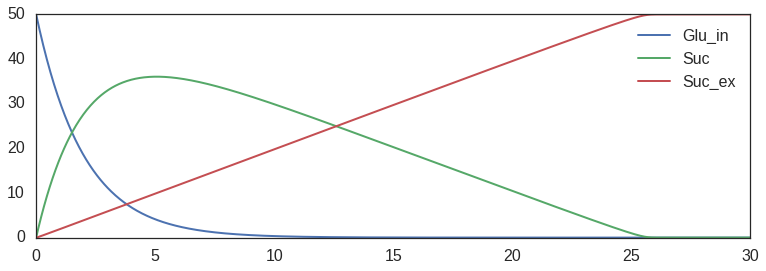

In [66]:
sns.set_context('poster')

fig = plt.figure(dpi=100)

plt.subplot(2,1,1)

for i,e in zip(range(3), ['Glu_in','Suc','Suc_ex']):
    plt.plot(t, data[:,i], lw=2, label=e)
    
plt.legend();